In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
title = "Software Developer"  
location = "Linköping"
NUMBER_OF_JOBS_TO_FETCH = 600
SAVE_DATA = True

In [13]:
jobs_df = pd.read_csv('./results/jobs_Software Developer_Linköping_2025-11-20.csv')
jobs_df.head(10)

,job_title,company_name,location,time_posted,num_applicants
0,Algoritmutveckling / Reglerteknik / Modellbase...,Combine,Linköping,2 weeks ago,0
1,System developer to Linköping!,TMC Sweden,Linköping,6 days ago,26
2,Testare inom mjukvara,Professional Galaxy AB,Linköping,8 months ago,39
3,Utvecklare Java,Nexer Group,Linköping,2 days ago,0
4,"Software Developer, Backend - Sectra Medical",Sectra,Linköping,2 weeks ago,192
5,Software Engineer,Voyado,Norrköping,6 days ago,29
6,Software Developer,Väderstad AB,Linköping,2 weeks ago,32
7,Java Software Engineer,Piktiv AB,Linköping,1 week ago,34
8,Erfaren .Net-utvecklare,XLENT,Norrköping,1 month ago,0
9,AI Software Developer,Knowit,Linköping,3 days ago,0


In [14]:
skill_usage = pd.read_csv("./results/skills_Software Developer_Linköping_2025-11-20.csv")
skill_usage.head(20)

,Programming Skill,Number of Job Postings
0,C++,12
1,Python,12
2,Git,12
3,C#,10
4,Azure,10
5,Kubernetes,8
6,SQL,8
7,Docker,7
8,CI/CD,7
9,Java,7


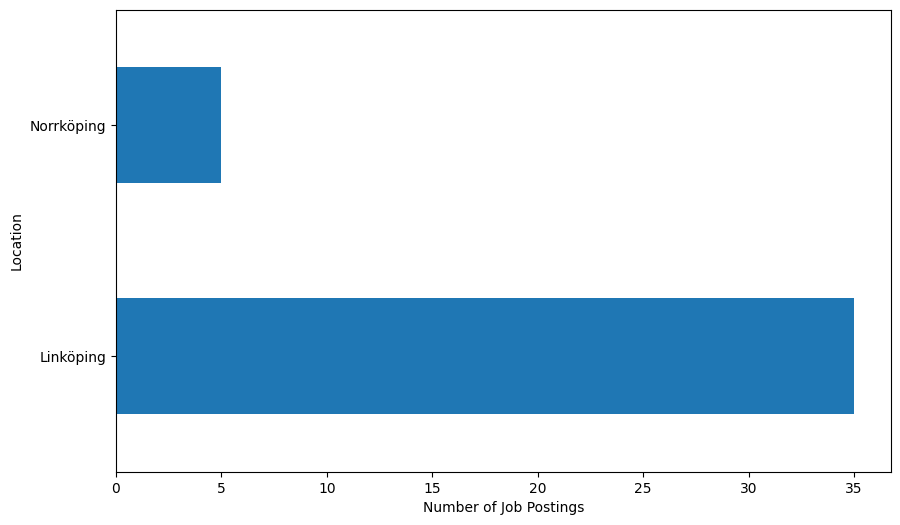

In [15]:
jobs_df["location"].value_counts().head(15).plot(kind='barh', figsize=(10, 6))
plt.ylabel('Location')
plt.xlabel('Number of Job Postings')
plt.savefig(f'./results/job_locations_{title}_{location}.png', bbox_inches='tight')
plt.show()

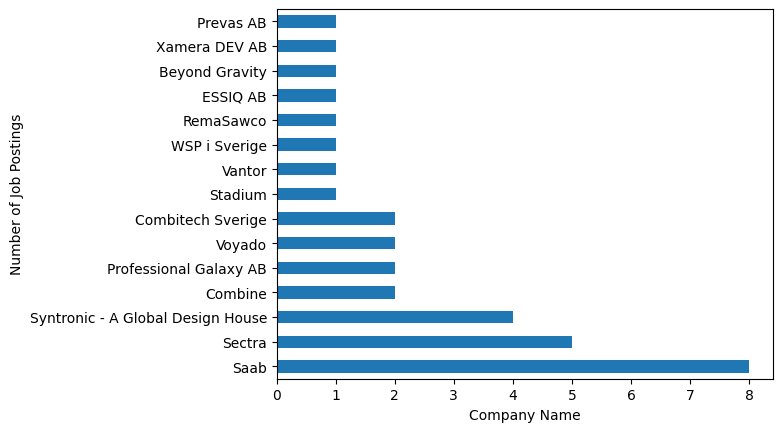

In [16]:
jobs_df["company_name"].value_counts().head(15).plot(kind='barh')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.savefig(f'./results/top_companies_{title}_{location}.png', )
plt.show()

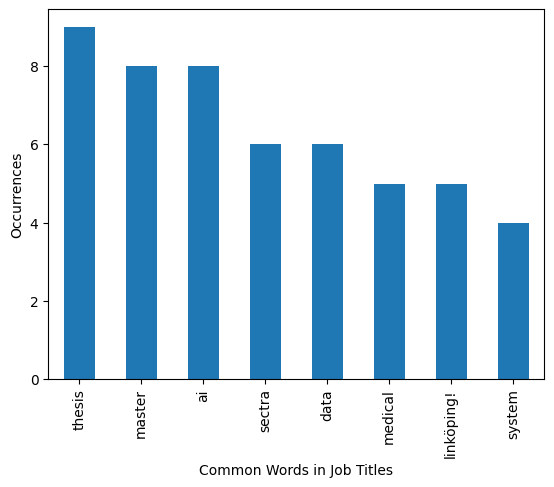

In [18]:
jobs_df['job_title_cleaned'] = jobs_df['job_title'].str.replace(r'[\/\-\,\(\)\.]', ' ', regex=True)
all_words = ' '.join(jobs_df['job_title_cleaned'].dropna().tolist()).lower().split()
word_counts = pd.Series(all_words).value_counts()
common_words = word_counts[word_counts > 2]
common_words.plot(kind='bar')
common_words = common_words.drop(errors="ignore", labels=['developer', "utvecklare", "mjukvaruutvecklare", 'engineer', 'software', 'and', 'lead', "iii" 'ii', 'i', 'working', 'from', 'home', 'm/f/d', 'h/f', 'the', 'a', 'to', 'in', 'of', 'for', 'with', 'on', 'at', 'as', 'is', 'by', 'an', "inom", "för", "all", "+", "-", "&", "|", "till"])
common_words = common_words.head(20)
common_words.plot(kind='bar')
plt.xlabel('Common Words in Job Titles')
plt.ylabel('Occurrences')
plt.savefig(f'./results/common_words_job_titles_{title}_{location}.png')
plt.show()

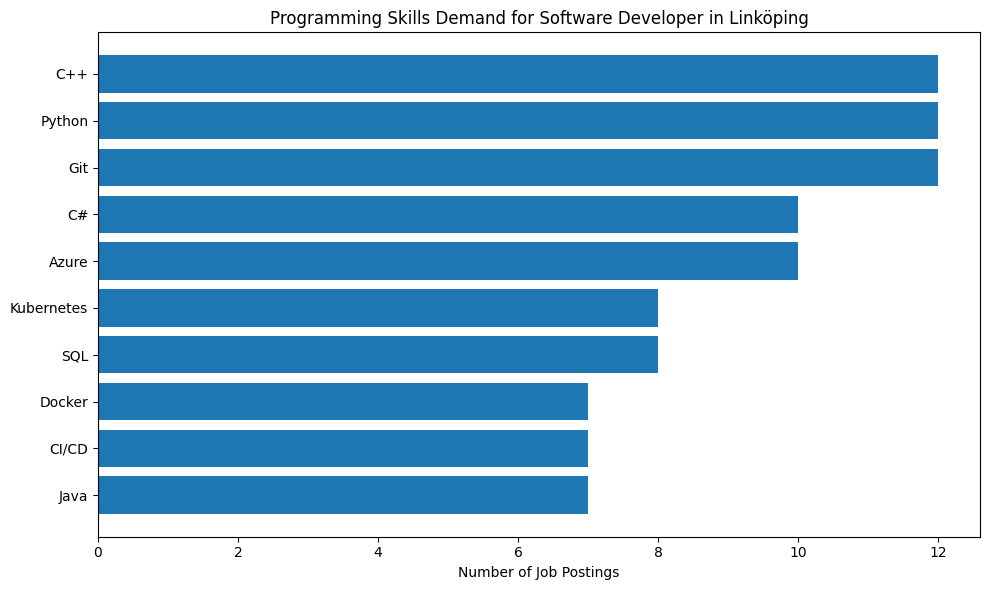

In [19]:
plt.figure(figsize=(10, 6))
plt.barh(skill_usage['Programming Skill'].iloc[:10], skill_usage['Number of Job Postings'].iloc[:10])
plt.xlabel('Number of Job Postings')
plt.title(f'Programming Skills Demand for {title} in {location}')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.savefig(f'./results/skills_demand_{title}_{location}.png')
plt.show()